XYZ → α = 0.0116, β = 0.000048
ABC → α = 0.0088, β = 0.000052
LMN → α = 0.0088, β = 0.000052


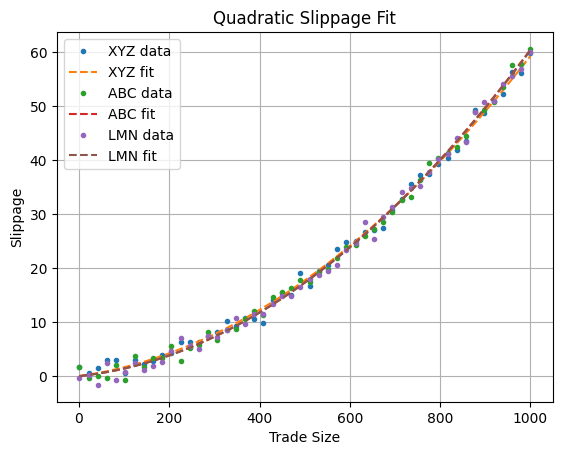

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

tickers = ['XYZ', 'ABC', 'LMN']
def model(x, alpha, beta):
    return alpha * x + beta * x**2

for i, ticker in enumerate(tickers):
    np.random.seed(i)
    x = np.linspace(1, 1000, 50)
    y = 0.01 * x + 0.00005 * x**2 + np.random.normal(0, 1, len(x))
    popt, _ = curve_fit(model, x, y)
    plt.plot(x, y, '.', label=f'{ticker} data')
    plt.plot(x, model(x, *popt), '--', label=f'{ticker} fit')
    print(f'{ticker} → α = {popt[0]:.4f}, β = {popt[1]:.6f}')

plt.xlabel('Trade Size')
plt.ylabel('Slippage')
plt.title('Quadratic Slippage Fit')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
S = 10000
alpha_i = np.random.uniform(0.01, 0.05, 390)
beta_i = np.random.uniform(1e-6, 2e-5, 390)

def total_trade_size(lambda_val):
    x = (lambda_val - alpha_i) / (2 * beta_i)
    return np.sum(x) - S

from scipy.optimize import bisect
lambda_star = bisect(total_trade_size, 0.01, 10)
x_i = (lambda_star - alpha_i) / (2 * beta_i)

print(f'Optimal λ: {lambda_star:.4f}')
print(f'Total traded shares: {np.sum(x_i):.2f}')

Optimal λ: 0.0297
Total traded shares: 10000.00
